# Cleaning US Census Data

We work as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

We have all the data for the most recent census. It is in multiple `csv` files. 

We are to make some scatterplots and histograms.

### Inspect the Data

1. The first visualization to make is a scatterplot that shows average income in a state vs proportion of women in that state.


2. We load and inspect the data. 

Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called like `us_census`.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as glob

f_names = glob.glob("states*.csv")
df_frames = []
for f_name in f_names:
    data = pd.read_csv(f_name)
    df_frames.append(data)
    
us_census = pd.concat(df_frames).reset_index(drop=True)

us_census = us_census.drop(['Unnamed: 0'], axis=1)

print(us_census.head(10))

                  State  TotalPop Hispanic   White   Black  Native   Asian  \
0               Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1                Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2               Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3              Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4            California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   
5              Colorado   5278906   20.78%  69.90%   3.55%   0.57%   2.66%   
6              Colorado   5278906   20.78%  69.90%   3.55%   0.57%   2.66%   
7           Connecticut   3593222   15.60%  67.68%  10.35%   0.13%   4.02%   
8              Delaware    926454    8.82%  64.63%  20.74%   0.26%   3.27%   
9  District of Columbia    647484    9.17%  33.10%  51.78%   0.20%   3.38%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2  

3. We look at the `.columns` and the `.dtypes` of the `us_census` DataFrame.

In [20]:
print(us_census.columns)
print(us_census.dtypes)


Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


4. Looking at the `head()` of the DataFrame we can understand why some of these `dtypes` are objects instead of integers or floats.

We have to convert these columns into the right types for manipulation.

### Using Regex

5. We use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [21]:
us_census.Income = us_census.Income.str.replace('$|,','', regex=True)

us_census.Income = pd.to_numeric(us_census.Income.str[1:])

print(us_census.Income.head())

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
Name: Income, dtype: float64


6. We look at the `GenderPop` column. We are going to separate this into two columns, the `Men` column, and the `Women` column.


In [22]:
g_split = us_census.GenderPop.str.split('_', expand=True)
g_split
us_census['Men'] = g_split[0]
us_census['Women'] = g_split[1]
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135M,19334329F


7. Then we convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [23]:
us_census.Men = us_census.Men.str.replace('M', '')
us_census.Women = us_census.Women.str.replace('F', '')
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)

print(us_census.dtypes)
us_census.head()


State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0


8. Now we have the columns we need to make the graph!


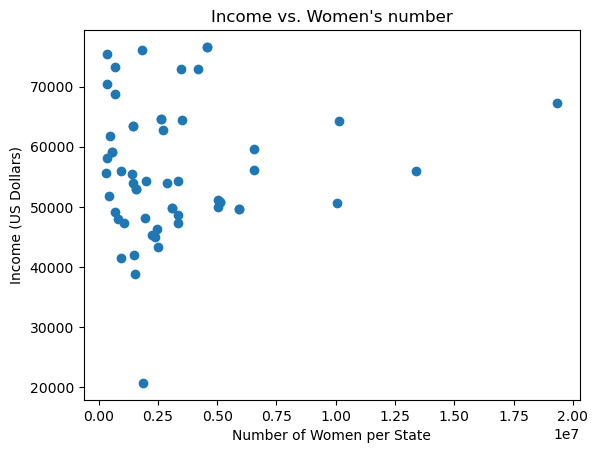

<Figure size 640x480 with 0 Axes>

In [24]:
plt.scatter(us_census.Women, us_census.Income)
plt.title("Income vs. Women's number")
plt.xlabel("Number of Women per State")
plt.ylabel("Income (US Dollars)")
plt.show()
plt.clf()

9. We are going to check if our data ibcludes `nan` values and then we have to remove all `nan` values.

In [26]:
print(us_census['Women'].isna().value_counts())
us_census.Women=us_census.Women.fillna(us_census.TotalPop-us_census.Men)
print(us_census['Women'].isna().value_counts())

Women
False    60
Name: count, dtype: int64
Women
False    60
Name: count, dtype: int64


10. We have to check for duplicates!

In [27]:
print(us_census.duplicated())
us_census.head(15)

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
6,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615.0
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810.0


11. Let's drop those duplicates using the `.drop_duplicates()` function.

In [28]:
us_census = us_census.drop_duplicates().reset_index(drop=True)
us_census.head(15)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
6,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615.0
7,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0
8,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810.0
9,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009M_10045763F,9600009,10045763.0


12. Now we make the scatterplot again.

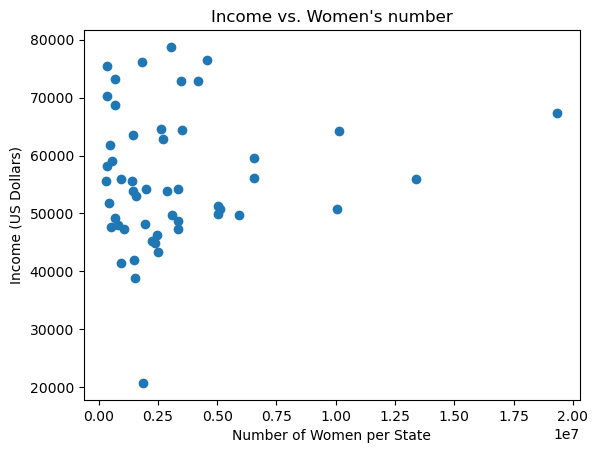

<Figure size 640x480 with 0 Axes>

In [29]:
plt.scatter(us_census.Women, us_census.Income)
plt.title("Income vs. Women's number")
plt.xlabel("Number of Women per State")
plt.ylabel("Income (US Dollars)")
plt.show()
plt.clf()

## Histogram of Races

13. Now we are goping to make a few histograms out of the race data.

In [30]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

14. We'll make a histogram for each one!

In [31]:
for col in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    us_census[col] = us_census[col].str.replace('%','')
    us_census[col] = pd.to_numeric(us_census[col])


us_census.Pacific=us_census.Pacific.fillna(100.0 - us_census.Hispanic - us_census.White - us_census.Black - us_census.Native - us_census.Asian)


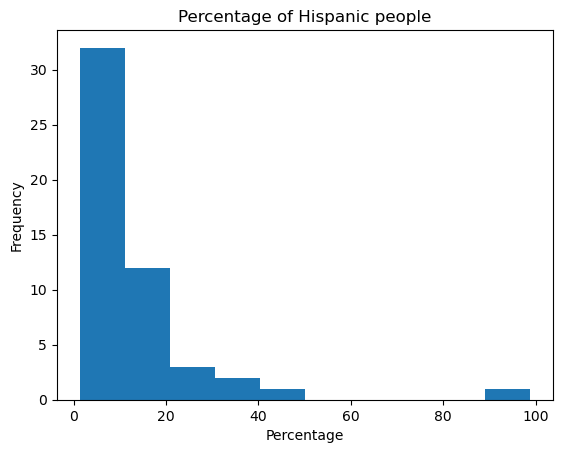

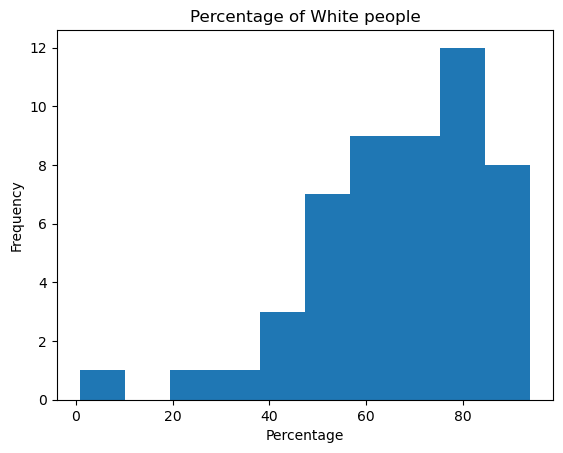

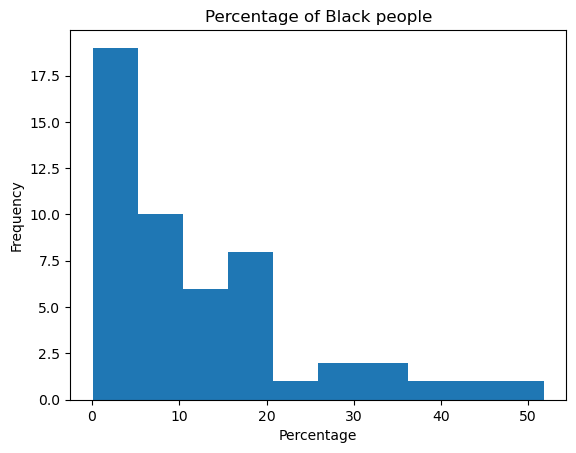

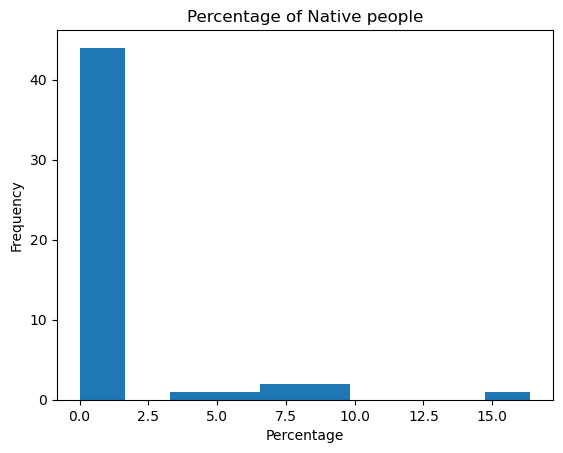

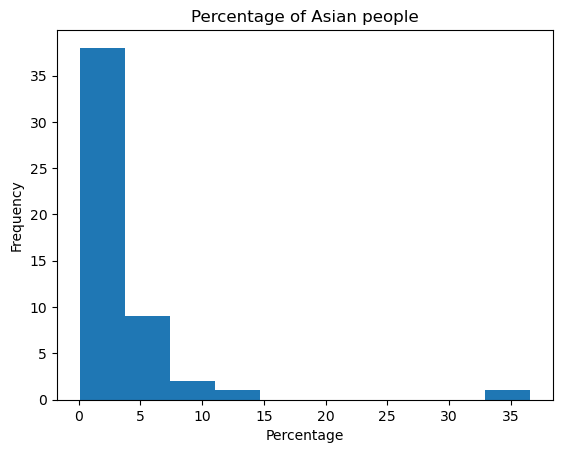

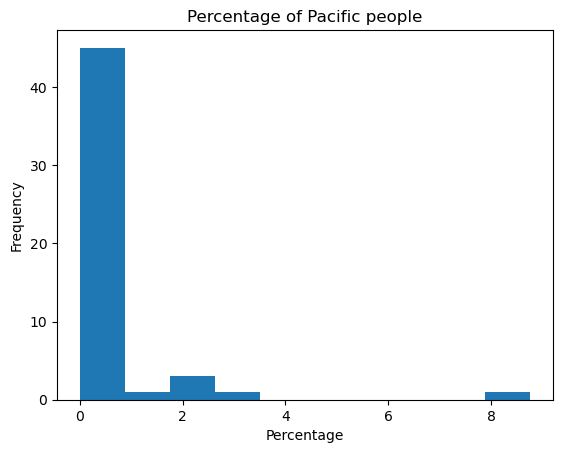

<Figure size 640x480 with 0 Axes>

In [32]:
us_census = us_census.drop_duplicates().reset_index(drop=True)

for col in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[col])
    plt.title("Percentage of {} people".format(col))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()